In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# X =  np.append(np.meshgrid(np.linspace(-1, 3, 51), np.linspace(-1, 3, 51)))
np.meshgrid(np.linspace(-1, 3, 51), np.linspace(-1, 3, 51))

[array([[-1.  , -0.92, -0.84, ...,  2.84,  2.92,  3.  ],
        [-1.  , -0.92, -0.84, ...,  2.84,  2.92,  3.  ],
        [-1.  , -0.92, -0.84, ...,  2.84,  2.92,  3.  ],
        ...,
        [-1.  , -0.92, -0.84, ...,  2.84,  2.92,  3.  ],
        [-1.  , -0.92, -0.84, ...,  2.84,  2.92,  3.  ],
        [-1.  , -0.92, -0.84, ...,  2.84,  2.92,  3.  ]]),
 array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
        [-0.92, -0.92, -0.92, ..., -0.92, -0.92, -0.92],
        [-0.84, -0.84, -0.84, ..., -0.84, -0.84, -0.84],
        ...,
        [ 2.84,  2.84,  2.84, ...,  2.84,  2.84,  2.84],
        [ 2.92,  2.92,  2.92, ...,  2.92,  2.92,  2.92],
        [ 3.  ,  3.  ,  3.  , ...,  3.  ,  3.  ,  3.  ]])]

In [53]:
def gauss(x, m, s):
    sigma_inv = np.linalg.inv(sigma)
    print(sigma_inv)
    exp_comp = np.matmul((x-mu).T, np.matmul(sigma_inv, x-mu)) / -2
    print(exp_comp)
    numer = np.exp(exp_comp)
    # denom = np.sqrt((2 * np.pi) ** 2 * np.linalg.det(sigma))
    z = numer

mu = np.array([[1],[1]])
sigma = np.array([[1, 0],[0, 2]])
axis = np.linspace(-1, 3, 50).reshape((50,1))
X = np.append(axis, axis, axis=1)
Z = gauss(mu, mu, sigma)
print(Z)

[[1.  0. ]
 [0.  0.5]]
[[-0.]]
None


[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


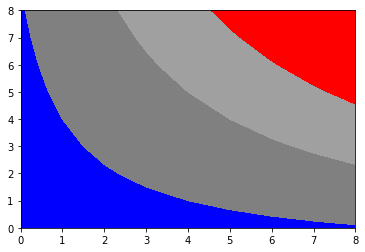

In [55]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
print(y)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

/tmp/ipykernel_8189/2831060218.py:4: RuntimeWarning: divide by zero encountered in true_divide
  z = z + 1/(np.sqrt((x - p[0])**2 + (y - p[1])**2))


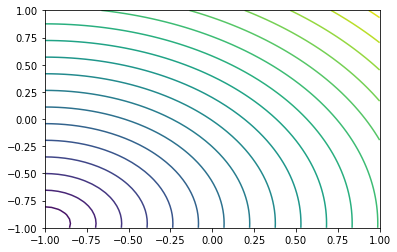

In [17]:
def f(x, y, pts):
    z = np.zeros_like(x)
    for p in pts:
        z = z + 1/(np.sqrt((x - p[0])**2 + (y - p[1])**2))
    return 1/z

b = [1, 2]

X, Y = np.meshgrid(np.linspace(-1, 1, 51), np.linspace(-1, 1, 51))
Z = f(X, Y, X)

CS = plt.contour(X, Y, Z, 20)

In [25]:
import random
nums = []
mu = np.array([[1],[1]])
sigma = np.array([[1, 0],[0, 2]])

for i in range(1000):
    temp = random.gauss(mu, sigma)
    nums.append(temp)
nums[0]

array([[-1.00787188,  1.        ],
       [ 1.        , -3.01574376]])